In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Netflix Dataset.csv")

# --- Data Cleaning ---
df.columns = [c.strip() for c in df.columns]
df['Release_Date_parsed'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['release_year'] = df['Release_Date_parsed'].dt.year

In [11]:
df.head()
df.info()
df.describe()
df.select_dtypes(include=np.number).corr()
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Date_parsed,release_year,genre_parsed,country_parsed
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,Dramas,United States


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Show_Id              7789 non-null   object        
 1   Category             7789 non-null   object        
 2   Title                7789 non-null   object        
 3   Director             5401 non-null   object        
 4   Cast                 7071 non-null   object        
 5   Country              7282 non-null   object        
 6   Release_Date         7779 non-null   object        
 7   Rating               7782 non-null   object        
 8   Duration             7789 non-null   object        
 9   Type                 7789 non-null   object        
 10  Description          7789 non-null   object        
 11  Release_Date_parsed  7691 non-null   datetime64[ns]
 12  release_year         7691 non-null   float64       
 13  genre_parsed         7789 non-nul

In [13]:
df.describe()

,Release_Date_parsed,release_year
count,7691,7691.000000
mean,2019-01-07 22:53:43.195943424,2018.507476
min,2008-01-01 00:00:00,2008.000000
25%,2018-02-07 00:00:00,2018.000000
50%,2019-03-15 00:00:00,2019.000000
75%,2020-01-25 12:00:00,2020.000000
max,2021-01-16 00:00:00,2021.000000
std,NaN,1.382141


In [16]:
df.select_dtypes(include=np.number).corr()

<IPython.core.display.Javascript object>

,release_year
release_year,1.0


In [18]:
df.isnull().sum()

Show_Id                   0
Category                  0
Title                     0
Director               2388
Cast                    718
Country                 507
Release_Date             10
Rating                    7
Duration                  0
Type                      0
Description               0
Release_Date_parsed      98
release_year             98
genre_parsed              0
country_parsed            0
dtype: int64

<Axes: >

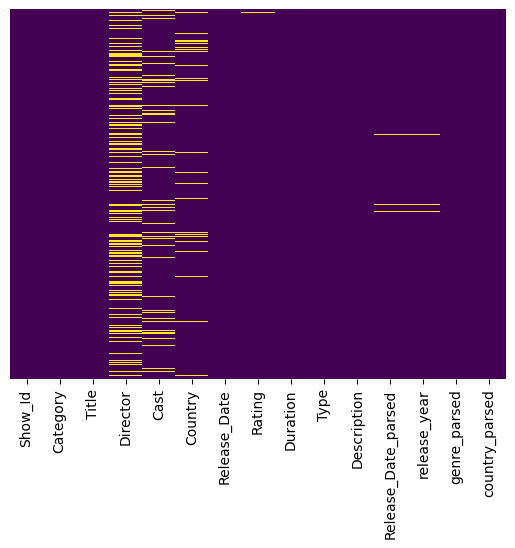

In [19]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

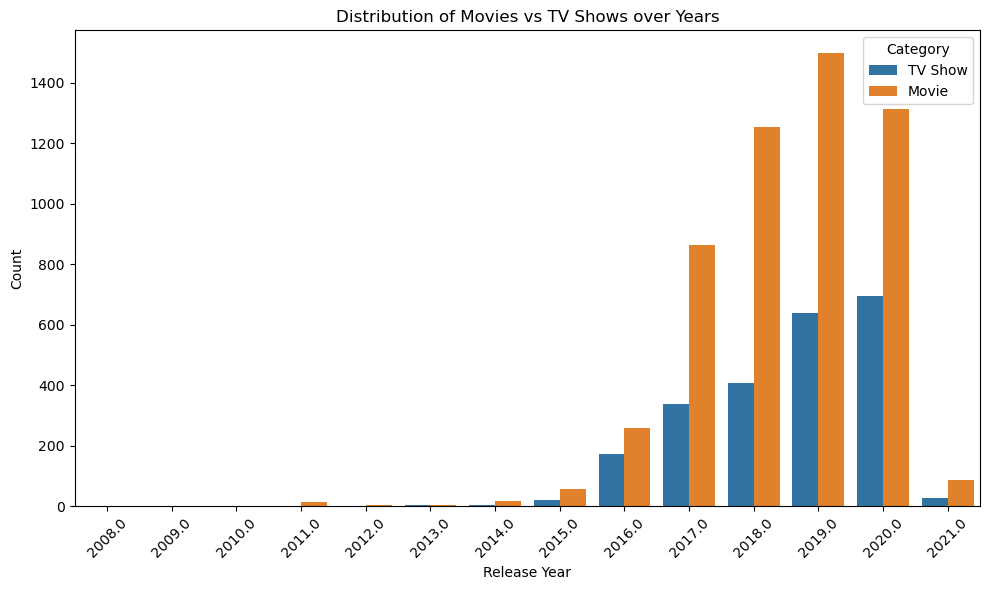

In [5]:
# --- Movies vs TV Shows over years ---
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='release_year', hue='Category')
plt.title("Distribution of Movies vs TV Shows over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("trend_category_year.png")
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

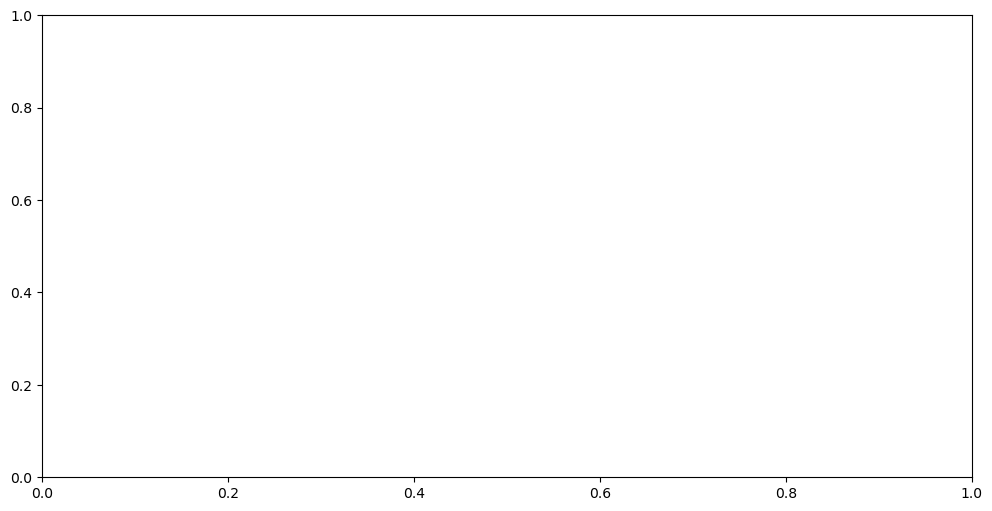

In [10]:
# --- Top Genres Trends ---
df['genre_parsed'] = df['Type'].fillna('Unknown').astype(str)
df_genres = df[['Title','release_year','genre_parsed']].copy()
df_genres['genre_parsed'] = df_genres['genre_parsed'].str.split(',')
df_genres = df_genres.explode('genre_parsed')
df_genres['genre_parsed'] = df_genres['genre_parsed'].str.strip()

top_genres = df_genres['genre_parsed'].value_counts().head(8).index
df_genres_top = df_genres[df_genres['genre_parsed'].isin(top_genres)]
plt.figure(figsize=(12,6))
sns.histplot(data=df_genres_top, x='release_year', hue='genre_parsed')
plt.title("Top Genres Trend over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.savefig("top_genres_trend.png")
plt.show()

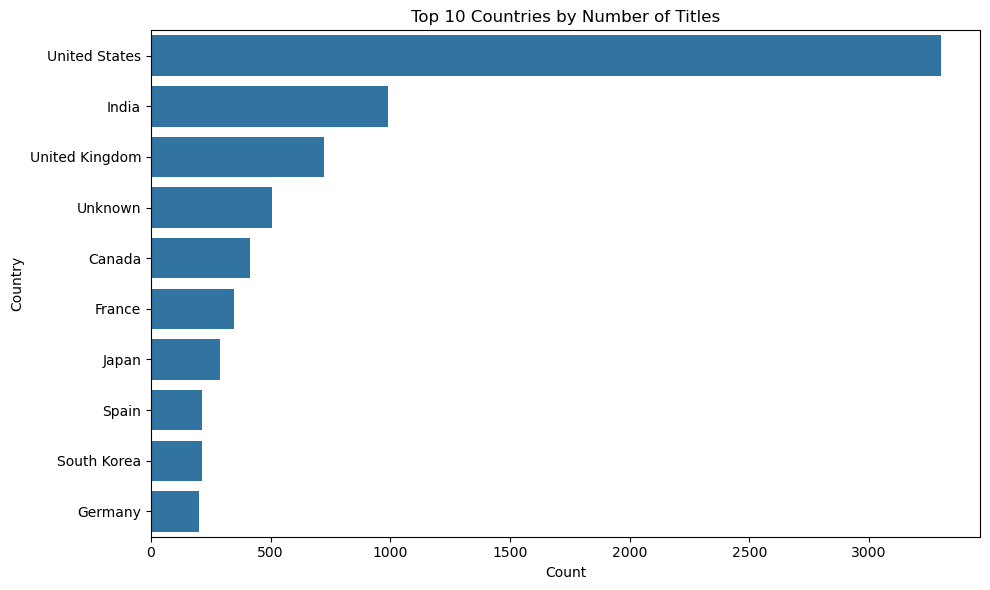

In [7]:
# --- Top Countries ---
df['country_parsed'] = df['Country'].fillna('Unknown').astype(str)
df_countries = df[['Title','country_parsed']].copy()
df_countries['country_parsed'] = df_countries['country_parsed'].str.split(',')
df_countries = df_countries.explode('country_parsed')
df_countries['country_parsed'] = df_countries['country_parsed'].str.strip()

top_countries = df_countries['country_parsed'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top_countries.png")
plt.show()
